In [121]:
import numpy as np
import matplotlib.pyplot as plt

# So cool settings
square_setting = {"marker": "s", "facecolor": "none", "edgecolor": "black"}
circle_setting = {"marker": "o", "color": "black"}
main_line = {"linestyle": "-", "color": "black"}
supporting_line = {"linestyle": "--", "linewidth": 0.5, "color": "black"}
blob_scatter = {"edgecolors": "black", "linewidth": 0.5}

Text(0.5, 1.0, 'Initial data')

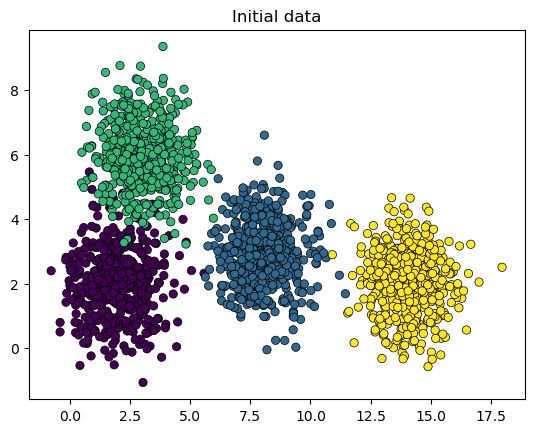

In [122]:
C, N = 4, 500 # number of classes and number of points per class
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]
x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)
x3 = np.random.multivariate_normal(means[3], cov, N)
X = np.concatenate([x0, x1, x2, x3], axis=0)
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N)

plt.scatter(X[:, 0], X[:, 1], c=y, **blob_scatter)
plt.title("Initial data")

In [123]:
def multilayer_SVM_loss(W, X, y, reg):
    d, C = W.shape
    n = X.shape[0]
    loss = 0
    dW = np.zeros_like(W)
    Z = X.dot(W)
    Z_yn = Z[np.arange(X.shape[0]), y].reshape(n, 1)
    margins = np.maximum(0, Z - Z_yn + 1)
    margins[np.arange(X.shape[0]), y] = 0
    loss = np.sum(margins)
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[np.arange(F.shape[0]), y] = np.sum(-F, axis=1)
    dW = X.T.dot(F) / N + reg * W
    return loss, dW

In [124]:
def multilayer_SVM(X, y, regularization=10, learning_rate=0.01, epochs=100, batch_size=100):
    W = np.random.rand(3, 4)
    n = X.shape[0]
    batch_num = int(np.ceil(n / batch_size))
    losses = list()
    for it in range(epochs):
        ID_list = np.random.permutation(n)
        for num in range(batch_num):
            batch_id = ID_list[batch_size*num:min(n, batch_size*(num + 1))]
            X_batch = X[batch_id]
            y_batch = y[batch_id]
            loss, dW = multilayer_SVM_loss(W, X_batch, y_batch, regularization)
            losses.append(loss)
            W -= learning_rate * dW
    return W, losses

In [128]:
res_W, loss_hist = multilayer_SVM(X, y, regularization=.1, learning_rate=0.05, batch_size=100)

Text(0.5, 1.0, 'Loss values')

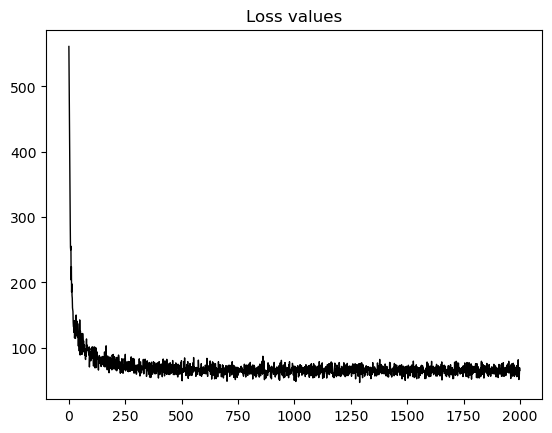

In [129]:
plt.plot(loss_hist, linewidth=1, c='black')
plt.title("Loss values")

Text(0.5, 1.0, 'Result in mutilayer SVM')

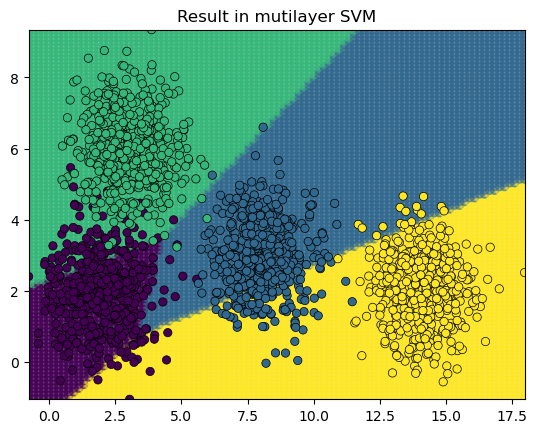

In [130]:
# Plot results
X_plot, Y_plot = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100),
                             np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100))
X_plot = X_plot.flatten()
Y_plot = Y_plot.flatten()
data_plot = np.vstack([X_plot, Y_plot, np.ones((1, 10000))]).T
labels = np.argmax(data_plot.dot(res_W), axis=1)

plt.scatter(X_plot, Y_plot, c=labels, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, **blob_scatter)
plt.xlim(X_plot[0], X_plot[-1])
plt.ylim(Y_plot[0], Y_plot[-1])
plt.title("Result in mutilayer SVM")